In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv("London.csv")

In [110]:
df

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
...,...,...,...,...,...,...,...,...,...,...,...
3475,3475,One Lillie Square,3350000,New development,1410,3,3,3,NaN,Lillie Square,SW6 1UE
3476,3476,St. James's Street,5275000,Flat / Apartment,1749,3,3,3,St James's,London,SW1A 1JT
3477,3477,Ingram Avenue,5995000,House,4435,6,6,6,Hampstead Garden Suburb,London,NW11 6TG
3478,3478,Cork Street,6300000,New development,1506,3,3,3,Mayfair,London,W1S 3AR


In [138]:
#creating new data set with relevant data and reducing the size of it
df1 = df[['Price','Area in sq ft']]
df1 = df1.sample(n=2000, random_state=1)

In [139]:
#checking for any missing values
df1.isnull().sum()

Price            0
Area in sq ft    0
dtype: int64

In [140]:
#df1.sort_index()

In [141]:
#df1['Price'].idmax()

Text(0, 0.5, 'Price')

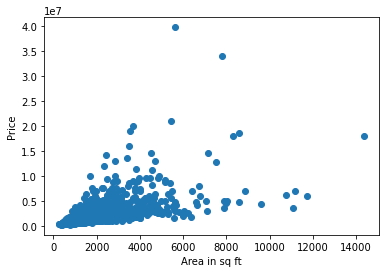

In [142]:
#plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(df1['Area in sq ft'], df1.Price)
plt.xlabel('Area in sq ft')
plt.ylabel('Price')